In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O  
#https://github.com/vaibhavvikas/housing-price-predictor/blob/main/house_pricing_predictor.ipynb

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error 
import pickle

df = pd.read_csv('train.csv');

df.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [2]:
print(df.describe())

       Property_Area  Number_of_Windows  Number_of_Doors  \
count   39499.000000       37845.000000     39499.000000   
mean     1391.715638           3.923768         2.331375   
std      1953.287544           2.690992         1.179964   
min       100.000000           0.000000         1.000000   
25%       494.000000           2.000000         1.000000   
50%       932.000000           4.000000         2.000000   
75%      1770.000000           5.000000         3.000000   
max     28064.000000          15.000000         6.000000   

       Frequency_of_Powercuts  Traffic_Density_Score  Air_Quality_Index  \
count            38116.000000           39499.000000       39499.000000   
mean                 0.484678               6.354772         121.352566   
std                  0.752207               1.219681          62.384669   
min                  0.000000               0.000000           0.000000   
25%                  0.000000               5.600000          95.000000   
50%      

In [3]:
df.keys()


Index(['Property_ID', 'Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
       'Habitability_score'],
      dtype='object')

In [4]:
#check for null values
df.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [5]:
df.dtypes[df.dtypes!='object'] #A list of our numerical features can be obtained with the code


Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Frequency_of_Powercuts    float64
Traffic_Density_Score     float64
Air_Quality_Index         float64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

array([[<AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Number_of_Windows'}>,
        <AxesSubplot:title={'center':'Number_of_Doors'}>],
       [<AxesSubplot:title={'center':'Frequency_of_Powercuts'}>,
        <AxesSubplot:title={'center':'Traffic_Density_Score'}>,
        <AxesSubplot:title={'center':'Air_Quality_Index'}>],
       [<AxesSubplot:title={'center':'Neighborhood_Review'}>,
        <AxesSubplot:title={'center':'Habitability_score'}>,
        <AxesSubplot:>]], dtype=object)

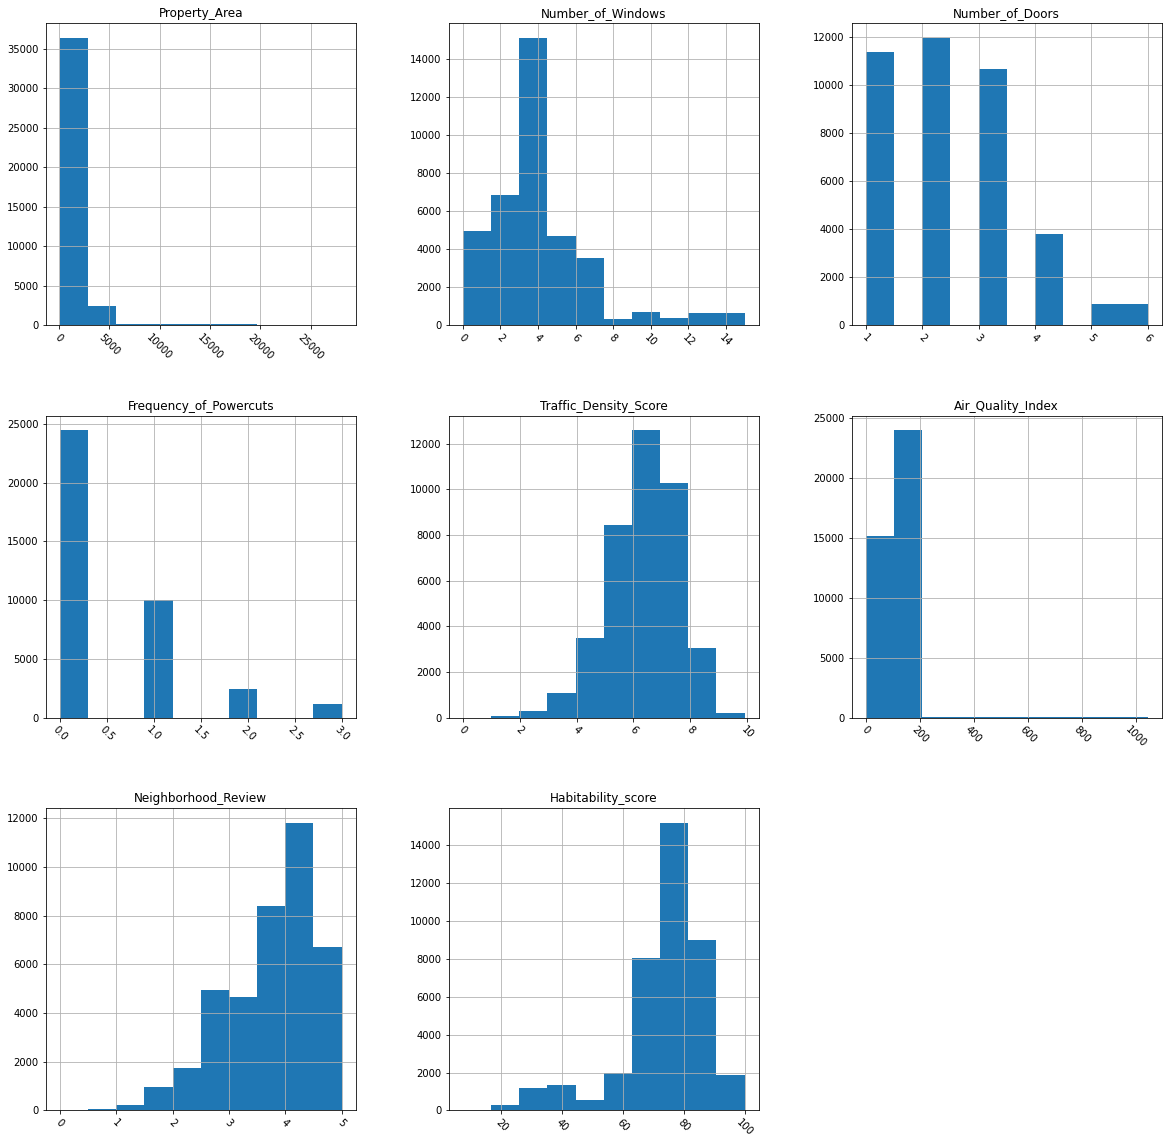

In [6]:
df.hist(figsize=(20,20), xrot=-45)


In [7]:
print("Median Score of HS",df.Habitability_score.median())
#sns.violinplot(data=df, x="Habitability_score")



Median Score of HS 75.76


In [8]:
print(df.select_dtypes(exclude=['object']).isnull().sum()) #these are the missing

#fill the missing values with 0
df.Number_of_Windows.fillna(0, inplace=True)
df.Frequency_of_Powercuts.fillna(0, inplace=True)
print(df.select_dtypes(exclude=['object']).isnull().sum()) #these are the missing

Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Frequency_of_Powercuts    1383
Traffic_Density_Score        0
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Frequency_of_Powercuts    0
Traffic_Density_Score     0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64


<AxesSubplot:>

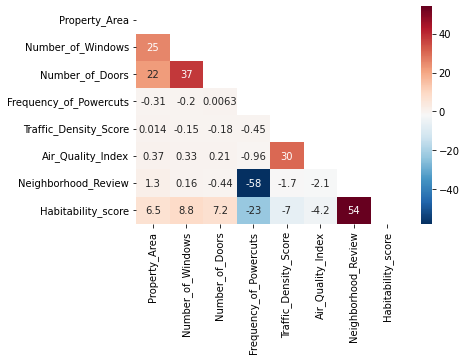

In [9]:
# mask out upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(df.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [10]:
df.dtypes[df.dtypes=='object']  #categorical Features


Property_ID       object
Property_Type     object
Furnishing        object
Power_Backup      object
Water_Supply      object
Crime_Rate        object
Dust_and_Noise    object
dtype: object

In [11]:
#find the values stored in all properties
df.Property_Type.value_counts()


Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64

In [12]:
print(df.Furnishing.value_counts())
print("******************************")
print(df.Power_Backup.value_counts())
print("******************************")
print(df.Water_Supply.value_counts())
print("******************************")
print(df.Crime_Rate.value_counts())
print("******************************")
print(df.Dust_and_Noise.value_counts())

Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64
******************************
No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64
******************************
All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: Water_Supply, dtype: int64
******************************
Well below average        19472
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64
******************************
Medium    32996
High       3212
Low        2072
Name: Dust_and_Noise, dtype: int64
